In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c9ed5714189687454c27c9cc55e769bb


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | solwezi
Processing Record 5 of Set 1 | beringovskiy
Processing Record 6 of Set 1 | flin flon
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | sao filipe
Processing Record 10 of Set 1 | wagar
Processing Record 11 of Set 1 | aswan
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | coahuayana
Processing Record 14 of Set 1 | port blair
Processing Record 15 of Set 1 | atasu
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | zvishavane
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | havre-saint-pierre
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | chokurdakh
Processing Record 22 of Set 1 | inham

Processing Record 37 of Set 4 | kruisfontein
Processing Record 38 of Set 4 | evansville
Processing Record 39 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 40 of Set 4 | nikolskoye
Processing Record 41 of Set 4 | vrangel
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | nadym
Processing Record 44 of Set 4 | ilebo
Processing Record 45 of Set 4 | yar-sale
Processing Record 46 of Set 4 | yugorsk
Processing Record 47 of Set 4 | general delgado
Processing Record 48 of Set 4 | flinders
Processing Record 49 of Set 4 | drumheller
Processing Record 50 of Set 4 | copiapo
Processing Record 1 of Set 5 | el campo
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | northam
Processing Record 4 of Set 5 | mocuba
Processing Record 5 of Set 5 | dunedin
Processing Record 6 of Set 5 | sola
Processing Record 7 of Set 5 | nsanje
Processing Record 8 of Set 5 | leningradskiy
Processing Record 9 of Set 5 | lasa
Processing Record 10 

Processing Record 28 of Set 8 | aberdeen
Processing Record 29 of Set 8 | bull savanna
Processing Record 30 of Set 8 | marienburg
Processing Record 31 of Set 8 | jinka
Processing Record 32 of Set 8 | huangmei
Processing Record 33 of Set 8 | ulkan
Processing Record 34 of Set 8 | kontagora
Processing Record 35 of Set 8 | boca do acre
Processing Record 36 of Set 8 | ejido
Processing Record 37 of Set 8 | acari
Processing Record 38 of Set 8 | severo-kurilsk
Processing Record 39 of Set 8 | ixtapa
Processing Record 40 of Set 8 | swellendam
Processing Record 41 of Set 8 | maneadero
Processing Record 42 of Set 8 | limbang
Processing Record 43 of Set 8 | chapais
Processing Record 44 of Set 8 | hvide sande
Processing Record 45 of Set 8 | euclides da cunha
Processing Record 46 of Set 8 | sambava
Processing Record 47 of Set 8 | ueckermunde
Processing Record 48 of Set 8 | itupiranga
Processing Record 49 of Set 8 | khani
Processing Record 50 of Set 8 | rotnes
Processing Record 1 of Set 9 | sal rei
Pro

Processing Record 14 of Set 12 | virginia beach
Processing Record 15 of Set 12 | whitehorse
Processing Record 16 of Set 12 | xining
Processing Record 17 of Set 12 | batagay-alyta
Processing Record 18 of Set 12 | jhang
Processing Record 19 of Set 12 | abu dhabi
Processing Record 20 of Set 12 | takoradi
Processing Record 21 of Set 12 | caravelas
Processing Record 22 of Set 12 | bairiki
Processing Record 23 of Set 12 | mangai
Processing Record 24 of Set 12 | kerki
City not found. Skipping...
Processing Record 25 of Set 12 | sarkand
Processing Record 26 of Set 12 | narok
Processing Record 27 of Set 12 | serowe
Processing Record 28 of Set 12 | severnyy
Processing Record 29 of Set 12 | paamiut
Processing Record 30 of Set 12 | suntar
Processing Record 31 of Set 12 | quatre cocos
Processing Record 32 of Set 12 | rudnogorsk
Processing Record 33 of Set 12 | naryan-mar
Processing Record 34 of Set 12 | usinsk
Processing Record 35 of Set 12 | buala
Processing Record 36 of Set 12 | aksu
Processing R

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,College,64.8569,-147.8028,-5.80,70,75,3.44,US,2021-02-05 23:18:10
1,Rikitea,-23.1203,-134.9692,78.22,72,11,14.05,PF,2021-02-05 23:22:49
2,Lompoc,34.6391,-120.4579,68.00,40,1,16.11,US,2021-02-05 23:22:49
3,Solwezi,-12.1688,26.3894,63.66,91,100,1.86,ZM,2021-02-05 23:22:49
4,Beringovskiy,63.0500,179.3167,-5.75,88,100,9.15,RU,2021-02-05 23:22:49
5,Flin Flon,54.7682,-101.8650,-16.60,63,20,13.80,CA,2021-02-05 23:22:49
6,Georgetown,5.4112,100.3354,79.00,83,20,6.62,MY,2021-02-05 23:22:49
7,Sao Filipe,14.8961,-24.4956,69.73,77,13,15.52,CV,2021-02-05 23:22:49
8,Wagar,16.1525,36.2032,59.07,34,0,9.80,SD,2021-02-05 23:22:50
9,Aswan,24.0934,32.9070,59.22,48,0,12.17,EG,2021-02-05 23:22:50


In [10]:
# Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,College,US,2021-02-05 23:18:10,64.8569,-147.8028,-5.80,70,75,3.44
1,Rikitea,PF,2021-02-05 23:22:49,-23.1203,-134.9692,78.22,72,11,14.05
2,Lompoc,US,2021-02-05 23:22:49,34.6391,-120.4579,68.00,40,1,16.11
3,Solwezi,ZM,2021-02-05 23:22:49,-12.1688,26.3894,63.66,91,100,1.86
4,Beringovskiy,RU,2021-02-05 23:22:49,63.0500,179.3167,-5.75,88,100,9.15
5,Flin Flon,CA,2021-02-05 23:22:49,54.7682,-101.8650,-16.60,63,20,13.80
6,Georgetown,MY,2021-02-05 23:22:49,5.4112,100.3354,79.00,83,20,6.62
7,Sao Filipe,CV,2021-02-05 23:22:49,14.8961,-24.4956,69.73,77,13,15.52
8,Wagar,SD,2021-02-05 23:22:50,16.1525,36.2032,59.07,34,0,9.80
9,Aswan,EG,2021-02-05 23:22:50,24.0934,32.9070,59.22,48,0,12.17


In [11]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1612568524.486141

In [14]:
today = time.strftime("%x")
today

'02/05/21'

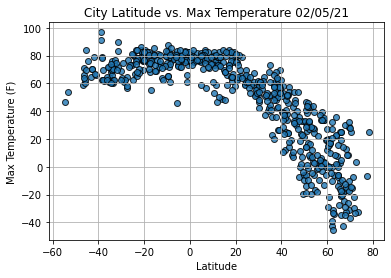

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

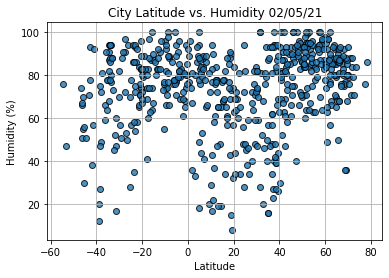

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

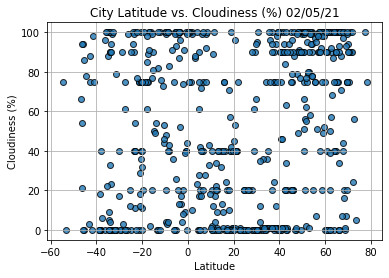

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

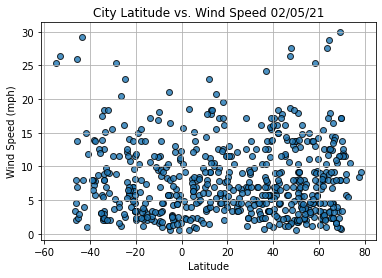

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()